In [5]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from positivitree.tree_vis import visualize_leaves_static, visualize_leaves_interactive
from positivitree import PositiviTree
import pandas as pd

In [3]:
np.random.seed(123)

In [6]:
df = pd.read_csv('../data/synth_2d_df.csv')
a = df['t']
X = df[['x1', 'x2']]

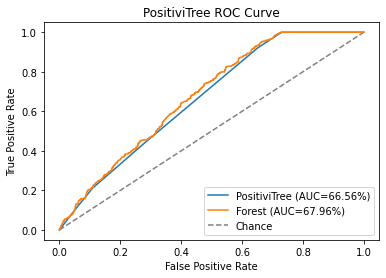

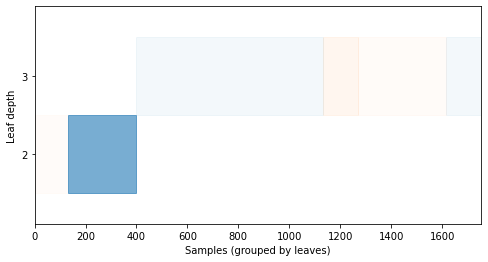

End.


In [14]:
ptree = PositiviTree(X, a,
                     violation_cutoff=0.1, consistency_cutoff=0.99,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_full = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_synth_2d.html')

print("End.")

In [15]:
leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)

print(len(q_set))
print(q_set)

(x2>0.011525199748575687)
(x1>-0.00043236499186605215)
2
{'x1', 'x2'}


In [35]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

df = pd.read_csv('../data/fp_injectables_data.csv')
encoding = pd.read_csv('../data/encoding.csv')

y = df['outcome'] * 1
a = df['treatment'] * 1
X = df[df.columns[:-2]]
X = X.apply(lambda x: x.fillna(x.median()),axis='rows')

# Select and Encode ordinal features
v = encoding[encoding['encoding'] == 'O']['var_name'].values
enc = OrdinalEncoder()
ord_data = enc.fit_transform(X[v])
ord_features = v

# Select and Encode nominal features
v = encoding[encoding['encoding'] == 'L']['var_name'].values
j = X[v].astype(int)
enc = OneHotEncoder(categories='auto')
nom_data = enc.fit_transform(j.astype(int))
nom_features = enc.get_feature_names(v)

# Select the discrete features
v = encoding[encoding['encoding'] == 'N']['var_name'].values
dis_data = X[v].values
dis_features = v

# Combine all the features
X_arr = np.concatenate((ord_data, nom_data.toarray(), dis_data), axis=1)
features_names = np.concatenate((ord_features, nom_features, dis_features))

print(X_arr.shape)
X_df = pd.DataFrame(X_arr, columns=features_names)

(5649, 317)


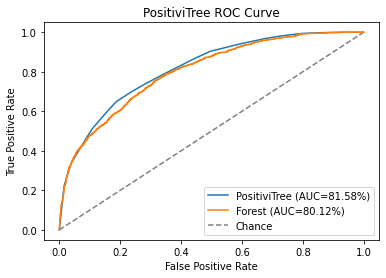

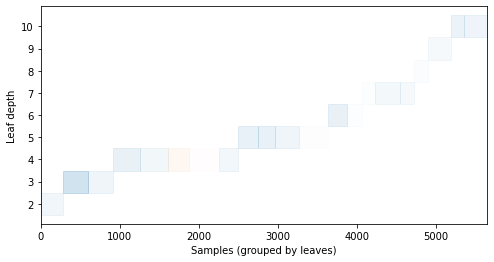

End.


In [11]:
ptree = PositiviTree(X_df, a,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_full = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_full.html')

print("End.")

In [12]:
print(len(X_df[violating_samples])/len(X_df))

leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)

print(len(q_set))
print(q_set)

0.11683483802442911
(v235<=0.5)
(v513_2<=0.5)
(v137<=0.5)
(v235<=0.5)
(v513_2<=0.5)
(v137>0.5)
(v159<=0.5)
4
{'v513_2', 'v235', 'v137', 'v159'}


In [ ]:
'(v235<=0.5) AND (v513_2<=0.5) AND (v137<=0.5)

# "Index last child prior to maternity-health (calendar)" == "No prior child"
# "Cohabitation duration (grouped)" == "Never married"
# "Number of children 5 and under in household (de jure)" == 0
# "Frequency of watching television" == "Not at all"

In [13]:
import json
with open('results/overall_full.json', 'w') as fp:
    fp.write(str(tree_json_full))

In [14]:
ax.get_figure().savefig('results/positivitree_overall.pdf')

In [15]:
X_df_ = X_df[X_df['v312_3'] == 0]
y_ = y[X_df['v312_3'] == 0]
a_ = a[X_df['v312_3'] == 0]

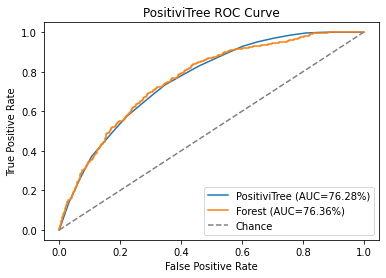

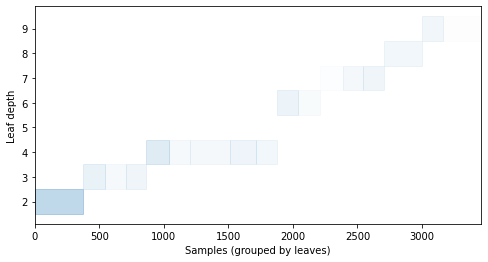

End.


In [22]:
ptree = PositiviTree(X_df_, a_,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_0 = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_0.html')

print("End.")

In [23]:
print(len(X_df_[violating_samples])/len(X_df_))

leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)

print(len(q_set))
print(q_set)

0.16030092592592593
(v235<=0.5)
(v501_0<=0.5)
(v513_1>0.5)
(v215<=202.5)
(v235<=0.5)
(v501_0>0.5)
4
{'v513_1', 'v215', 'v235', 'v501_0'}


In [ ]:
# "Index last child prior to maternity-health (calendar)" == "No prior child"
# "Current marital status" == "Never in union"
# "Cohabitation duration (grouped)" > "Never married"  -> Basically Married for some length of time
# "Time since last menstrual period" <= Xweeks ago
# "Current marital status" > "Never in union" -> Basically Married


'query': '(v235<=0.5) AND (v501_0>0.5)', 'consistency': 0.18717333333333333,

In [24]:
import json
with open('results/strata0_full.json', 'w') as fp:
    fp.write(str(tree_json_0))

In [25]:
ax.get_figure().savefig('results/positivitree_curr_0.pdf')

In [26]:
X_df_ = X_df[X_df['v312_3'] == 1]
y_ = y[X_df['v312_3'] == 1]
a_ = a[X_df['v312_3'] == 1]

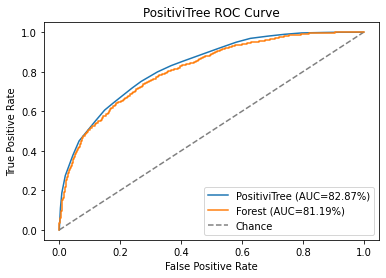

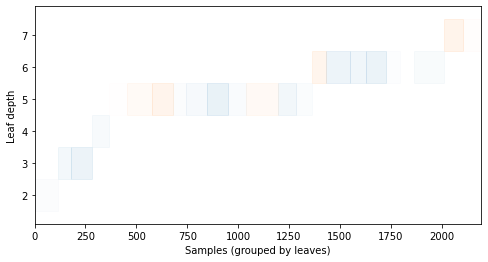

End.


In [27]:
ptree = PositiviTree(X_df_, a_,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_1 = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='results/positivitree_viz_1.html')

print("End.")

In [61]:
print(len(X_df_[violating_samples])/len(X_df_))

leaves = ptree.export_leaves(extract_rules_kws={"clause_joiner": None})
violating_leaves = [leaf for leaf in leaves if leaf['is_violating']]

q_set = set()
for leaf in violating_leaves:
    for q in leaf['query']:
        print(q)
        q_set.add(q.feature_name)
    print("q_end")

print(len(q_set))
print(q_set)

0.047879616963064295
(v208>0.5)
(v235<=1.0)
(v513_2<=0.5)
(v159<=0.5)
(v191>-33375.5)
q_end
5
{'v191', 'v159', 'v513_2', 'v208', 'v235'}


In [ ]:
"Births in last five years" > 0
"Index last child prior to maternity-health (calendar)" <= 1
"Cohabitation duration (grouped)"_5-9 == 0. -> is not (5-9)
"Frequency of watching television" == "Not at all"
"Wealth index factor score (5 decimals)" > -33375.5

'(v208>0.5) AND (v235<=1.0) AND (v513_2<=0.5) AND (v159<=0.5) AND (v191>-33375.5)

(array([  20.,  133.,  694., 1879., 1302.,  810.,  457.,  204.,  116.,
          34.]),
 array([-229605. , -170459.7, -111314.4,  -52169.1,    6976.2,   66121.5,
         125266.8,  184412.1,  243557.4,  302702.7,  361848. ]),
 <BarContainer object of 10 artists>)

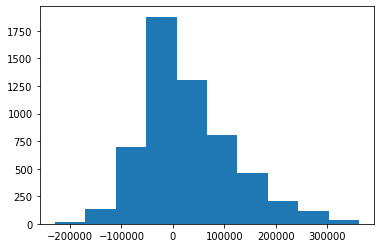

In [33]:
plt.hist(X_df['v191'])

In [29]:
import json
with open('results/strata1_full.json', 'w') as fp:
    fp.write(str(tree_json_1))

In [30]:
ax.get_figure().savefig('results/positivitree_curr_1.pdf')

In [249]:
from matplotlib_venn import venn2, venn3

In [304]:
support = X_df[(~X_df["v127_96"].astype(bool) & ~X_df["v131_22"].astype(bool) & 
                ~X_df["v150_7"].astype(bool) & ~X_df["v161_10"].astype(bool) &
                ~X_df["v312_13"].astype(bool) & ~X_df["v624_0"].astype(bool) & ~X_df["v624_6"].astype(bool) &
                ~X_df["v626_0"].astype(bool) & ~X_df["v626_6"].astype(bool) & (X_df["v227"] <= 1.000))]
propensity =   X_df[(X_df["v312_1"].astype(bool))
| (X_df["v312_2"].astype(bool))
| (X_df["v312_3"].astype(bool))
| (X_df["v312_11"].astype(bool))
| (X_df["v513_3"].astype(bool))
| (X_df["v513_4"].astype(bool))
| (X_df["v513_5"].astype(bool))
| (X_df["v513_6"].astype(bool))
| (X_df["v624_2"].astype(bool))]

# support = X_df[(~X_df["v127_96"].astype(bool) & ~X_df["v131_22"].astype(bool) & ~X_df["v150_7"].astype(bool) & ~X_df["v312_7"].astype(bool) & ~X_df["v312_13"].astype(bool) & ~X_df["v624_0"].astype(bool) & ~X_df["v624_6"].astype(bool) & ~X_df["v626_0"].astype(bool) & ~X_df["v626_6"].astype(bool) & (X_df["v227"] <= 1.000))]
# propensity =   X_df[((X_df["v191"] <= 149909.800))]

intersection = set(list(support.index)).intersection(set(list(propensity.index)))
knn_violating_index = list(set(X_df.index) - intersection)

In [305]:
len(knn_violating_index)

909

In [92]:
violating_samples_ptree = X_df_[violating_samples]

In [93]:
len(violating_samples_ptree)

105

In [ ]:
len(set(violating_samples_ptree.index).intersection(set(violating_index)))

In [282]:
support = X_df[(~X_df["v127_96"].astype(bool) & ~X_df["v131_22"].astype(bool) & 
                ~X_df["v150_7"].astype(bool) & ~X_df["v161_10"].astype(bool) &
                ~X_df["v312_13"].astype(bool) & ~X_df["v624_0"].astype(bool) & ~X_df["v624_6"].astype(bool) &
                ~X_df["v626_0"].astype(bool) & ~X_df["v626_6"].astype(bool) & (X_df["v227"] <= 1.000))]
propensity =   X_df[(~X_df["v113_61"].astype(bool) & ~X_df["v116_14"].astype(bool) & ~X_df["v127_12"].astype(bool) & ~X_df["v127_21"].astype(bool) & ~X_df["v312_14"].astype(bool) & ~X_df["v361_3"].astype(bool) & ~X_df["v361_4"].astype(bool))
| (~X_df["v127_21"].astype(bool) & ~X_df["v129_22"].astype(bool) & ~X_df["v131_5"].astype(bool) & ~X_df["v131_8"].astype(bool) & ~X_df["v131_21"].astype(bool) & ~X_df["v139_7"].astype(bool) & ~X_df["v312_14"].astype(bool) & ~X_df["v361_3"].astype(bool) & ~X_df["v361_4"].astype(bool) & ~X_df["v605_7"].astype(bool))]

# support = X_df[(~X_df["v127_96"].astype(bool) & ~X_df["v150_7"].astype(bool) & ~X_df["v161_10"].astype(bool) & ~X_df["v312_7"].astype(bool) & ~X_df["v312_13"].astype(bool) & ~X_df["v624_0"].astype(bool) & ~X_df["v624_6"].astype(bool) & ~X_df["v626_0"].astype(bool) & ~X_df["v626_6"].astype(bool) & (X_df["v227"] <= 1.000))]
# propensity =   X_df[((X_df["v152"] <= 30.000)) | ((X_df["v235"] > 0.000))]

intersection = set(list(support.index)).intersection(set(list(propensity.index)))
clr_violating_index = list(set(X_df.index) - intersection)

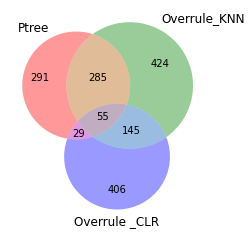

In [283]:
set1 = set(violating_samples_ptree.index)
set2 = set(knn_violating_index)
set3 = set(clr_violating_index)

fig, ax = plt.subplots()
venn3([set1, set2, set3], ('Ptree', 'Overrule_KNN', 'Overrule _CLR'), ax=ax)
ax.get_figure().savefig('venn_0.7.pdf')

In [95]:
overlap_indices = set(X_df_.index).difference(set(violating_samples_ptree.index))

In [96]:
1 - len(overlap_indices)/len(X_df_)

0.04787961696306431

In [97]:
y = y_.loc[overlap_indices]
a = a_.loc[overlap_indices]
X = X_df_.loc[overlap_indices]

In [37]:
from causallib.estimation import IPW
from causallib.evaluation import PropensityEvaluator

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV

In [38]:
strartify_by = (a*2) + y
X_train, X_test, a_train, a_test, y_train, y_test = train_test_split(
    X_df, a, y, 
    train_size=0.7,
    test_size=0.3,
    shuffle=True, 
    random_state=1, 
    stratify=strartify_by
)

print(X_test.shape)

(1695, 317)


In [41]:
# Overall = 0.05, Sigmoid
# 0 - 0.5, Isotonic
# 1 - 0.05, Isotonic

base_estimator = LogisticRegression(
    penalty="l2", 
    max_iter=2000,
    class_weight="balanced",
    random_state=2,
    solver='lbfgs',
    C=0.5
)
learner = CalibratedClassifierCV(base_estimator=base_estimator, cv=5, method='sigmoid')

ipw = IPW(make_pipeline(StandardScaler(), learner), use_stabilized=True)
ipw.fit(X_train, a_train)

IPW(truncate_eps=None, use_stabilized=True,
    learner=Pipeline(steps=[('standardscaler', StandardScaler()),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.5,
                                                                          class_weight='balanced',
                                                                          max_iter=2000,
                                                                          random_state=2),
                                        cv=5))]))

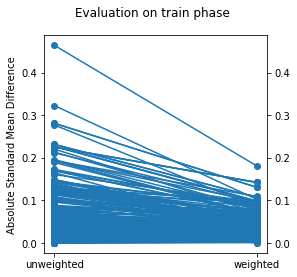

In [54]:
plots=["covariate_balance_slope"]
evaluator = PropensityEvaluator(ipw)
evaluations = evaluator.evaluate_simple(X_train.astype(float), a_train, y_train, plots=plots)

fig = evaluations.plots['covariate_balance_slope'].get_figure().set_size_inches(4, 4) 

In [60]:
import matplotlib
matplotlib.rcParams['font.family']

['sans-serif']

In [58]:
evaluations.plots['covariate_balance_slope'].get_figure().savefig('covariate_balance_slope.png')

In [117]:
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

effects = []
for i in range(2000):
    X_r, a_r, y_r = resample(X_test, a_test, y_test, n_samples=None, random_state=i)
    
    X_r = X_r.reset_index(drop=True)
    a_r = a_r.reset_index(drop=True)
    y_r = y_r.reset_index(drop=True)
    
    potential_outcomes = ipw.estimate_population_outcome(X_r, a_r, y_r)
    causal_effect = ipw.estimate_effect(potential_outcomes[1], potential_outcomes[0])
    effects.append(causal_effect)

median = np.median(effects)
lower = np.percentile(effects, 2.5)
upper = np.percentile(effects, 97.5)
print(median, lower, upper)

-0.005726920953442984 -0.02861861534261454 0.021401574857211485


In [118]:
evaluations.plots['weight_distribution'].get_figure().savefig('results/overlap_1_ptree.pdf')